In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%matplotlib inline 
sns.set_style("dark")


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
## 用于计算分类的结果
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

## 读取数据, 数据的EDA

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [5]:
train.shape

(42000, 785)

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
target = train['label']
train = train.drop("label", 1)

/home/kongweikun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


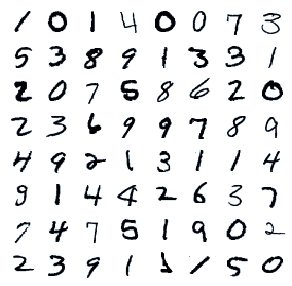

In [22]:
## 绘图展示64个数字
plt.figure(figsize=(5,5))
for digit_num in range(0, 64):
    plt.subplot(8, 8, digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation="none", cmap="bone_r")
    plt.xticks([])
    plt.yticks([])

In [26]:
n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

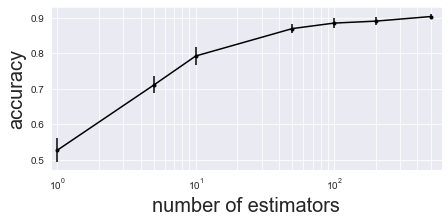

In [27]:
plt.figure(figsize=(7, 3))
plt.errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.xlim(0.9, 600)
plt.grid(which="both")

#### 寻找重要特征们 

特征权重排行:
1. feature 409 (0.009153)
2. feature 378 (0.008812)
3. feature 406 (0.008344)
4. feature 350 (0.007988)
5. feature 405 (0.007688)
6. feature 433 (0.007497)
7. feature 461 (0.006980)
8. feature 347 (0.006862)
9. feature 154 (0.006761)
10. feature 377 (0.006720)


Text(0, 0.5, 'importance')

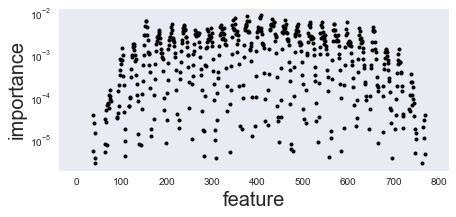

In [34]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("特征权重排行:")
for f in range(0, 10):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))


plt.figure(figsize=(7,3))
plt.plot(indices[:], importances[indices[:]], 'k.')
plt.yscale("log")
plt.xlabel("feature", size=20)
plt.ylabel("importance", size=20)

计算的结果中, 最大的才0.009...., 所以总体来说, 没有对结果倒向影响特别大的特征, 所以使用PCA进行降维处理, 将特征从784降到个位数

Text(0, 0.5, 'PC2')

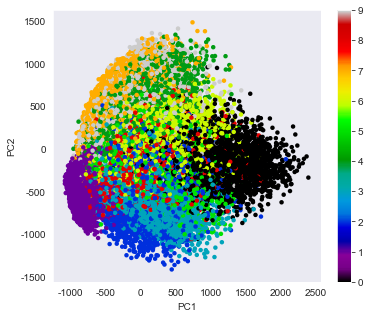

In [35]:
pca = PCA(n_components=2)
pca.fit(train)
transform = pca.transform(train)

plt.figure(figsize=(6, 5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [36]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1    

Text(0, 0.5, 'variance ratio')

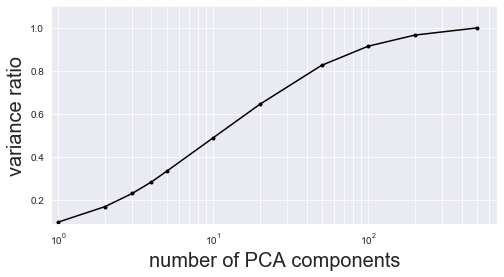

In [41]:
plt.figure(figsize=(8,4))
plt.plot(n_components_array, vr,'k.-')
plt.xscale("log")
plt.ylim(9e-2,1.1)
plt.xlim(0.9)
plt.grid(which="both")
plt.xlabel("number of PCA components",size=20)
plt.ylabel("variance ratio",size=20)

In [42]:
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:1000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
    i=i+1

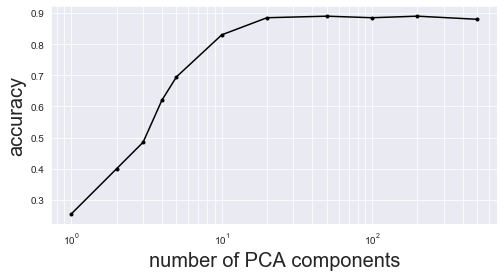

In [45]:
plt.figure(figsize=(8, 4))
plt.plot(n_components_array,score_array,'k.-')
plt.xscale('log')
plt.xlabel("number of PCA components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

In [46]:
# PCA + KNN 
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

clf = KNeighborsClassifier()
clf.fit(transform_train, target)
results = clf.predict(transform_test)

In [47]:
## 提交结果
np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')